In [28]:
import numpy
import scipy.special
import codecs
import matplotlib
import matplotlib.pyplot

class neuralNetWork :
    
    def __init__(self, inputnodes, hiddennodes, outputnodes, learningrate):
        self.inodes = inputnodes
        self.hnodes = hiddennodes
        self.onodes = outputnodes
        self.lr = learningrate
        
        # self.wih = numpy.random.rand(self.hnodes, self.inodes)-0.5
        # self.who = numpy.random.rand(self.onodes, self.hnodes)-0.5
        
        self.wih = numpy.random.normal(0.0, pow(self.hnodes, -0.5), (self.hnodes, self.inodes))
        self.who = numpy.random.normal(0.0, pow(self.onodes, -0.5), (self.onodes, self.hnodes))
        #print self.wih
        
        #触发sigmod函数
        self.activation_function = lambda x: scipy.special.expit(x)
        
        pass
    
    def train(self, inputs_list, target_list):
        inputs = numpy.array(inputs_list, ndmin = 2).T
        targets = numpy.array(inputs_list, ndmin = 2).T
        
        hidden_inputs = numpy.dot(self.wih, inputs)
        hidden_outputs = self.activation_function(hidden_inputs)
        
        final_inputs = numpy.dot(self.who, hidden_outputs)
        final_outputs = self.activation_function(final_inputs)
        
        output_errors = targets - final_outputs
        hidden_errors = numpy.dot(self.who.T, output_errors)
        
        self.who += self.lr * numpy.dot((output_errors * final_outputs * (1.0 - final_outputs)), numpy.transpose(hidden_outputs))
        self.wih += self.lr * numpy.dot((hidden_errors * hidden_outputs * (1.0 - hidden_outputs)), numpy.transpose(inputs))
        
        pass
    
    def query(self, inputs_list):
        inputs = numpy.array(inputs_list, ndmin = 2).T
        
        hidden_inputs = numpy.dot(self.wih, inputs)
        hidden_outputs = self.activation_function(hidden_inputs)
        
        final_inputs = numpy.dot(self.who, hidden_outputs)
        
        final_outputs = self.activation_function(final_inputs)
        
        return final_outputs
    

In [29]:
input_nodes = 3
hidden_nodes = 3
output_nodes = 3
learn_rate = 0.3

n = neuralNetWork(input_nodes, hidden_nodes, output_nodes, learn_rate)


In [30]:
n.query([1.0, 0.5, -1.5])

array([[0.6032345 ],
       [0.51012983],
       [0.65682382]])

In [31]:
data_file = open("F:/code/neuralnetwork/mnist_csv/mnist_train_1000.csv")
data_list = data_file.readlines()
data_file.close()

In [32]:
len(data_list)

1000

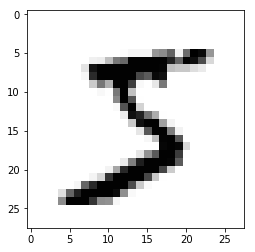

In [34]:
all_values = data_list[0].strip().split(',')
#print all_values
image_array = numpy.asfarray(all_values[1:]).reshape((28,28))
#print image_array
matplotlib.pyplot.imshow(image_array, cmap='Greys', interpolation='None')